# SPE GCS DASG Hackaton Competition - Fiber Optics Data [Proposal]

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Overview

We have 3 sets of data that are of interest:
1) "Low Frequency FBE" data which are the fiber optics measurements every ~2.5ft along the well measured every 10 seconds.
2) "High Frequency FBE" data which are essentially the same as the one above with the difference that there are 8 "bands" of measurement at every measurement point.
3) Pressure and temperature daata that are recorded at 3 different depths along the well and they're [almost] equidistant (487ft, 2023ft, 3502ft, 5024ft) and measurement frequency is per second

# Low Frequency Data Import

Code in the cell below imports all the low frequency FBE data. The data is loaded into a dictionary "LowFreqDataDic". I selected the key to be the start and beginning timestaps for each chunk of data. As you can see there are 4 different time periods where tests were performed and those are the time periods were fiber optics data are available.

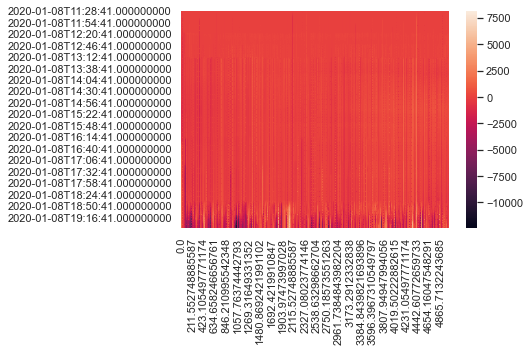

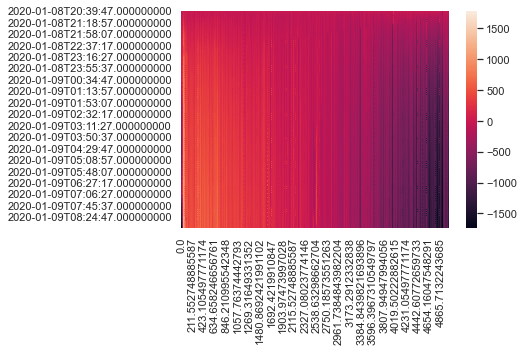

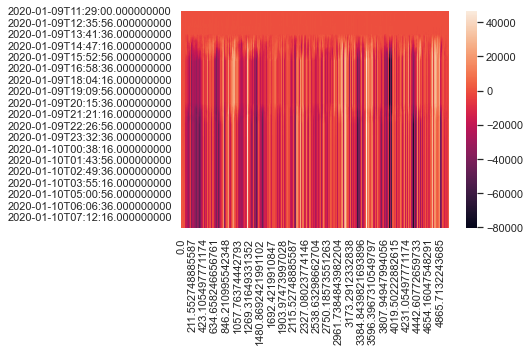

In [2]:
lowFreqFBEdays = [os.path.join("LSU_Day1_Test_Jan08_2020", "LowFreqFbe_DM_TZ_corrected", 
         "hDvs_01_DEPTH_DM_TZ_5032ft_LFFbe.csv"), 
        os.path.join("LSU_Day1_Test_Jan08_2020_Overnight", "LowFreqFbe_DM_TZ_Corrected",
        "hDvs_01_DEPTH_DM_TZ.csv"), 
        os.path.join("LSU_Day2_Test_Jan09_2020", "LowFreqFbe_DM_TZ_Corrected", 
        "hDvs_01_DEPTH_DM_TZ_LF_Fbe.csv")]
LowFreqFBEpaths=[]
for day in lowFreqFBEdays:
    LowFreqFBEpaths.append(os.path.join("Data" ,"LSU DAS - FBE", day))

LowFreqDataDic = {}
for path in LowFreqFBEpaths:
    df=pd.read_csv(path, header=1, index_col=0)
    df=df.T
    df.drop(df.tail(1).index,inplace=True) #drop last row, it doesn't have any data
    df.index = pd.to_datetime(df.index)
    LowFreqDataDic.update({(df.index[0], df.index[-1]) : df})
    sns.set()
    sns.heatmap(df)
    plt.show()

# High Frequency Data Import

If you're more adventurous and want to work with the "high frequency FBE data", the cell below imports all that data into a dictionary named "HighFreqBandsDic".
This dictionary is, in fact, a nested dictionary. The first (highest level) key is the band number (between 0 to 7) and the second level key and values are exactly the same as the low frequency data explained above.

band 0 from 2020-01-08 11:28:41 to 2020-01-08 19:41:41:


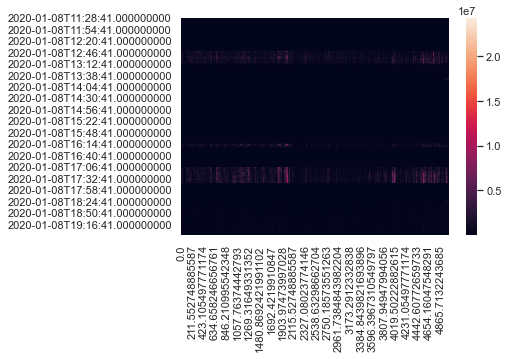

band 0 from 2020-01-08 20:39:47 to 2020-01-09 09:03:17:


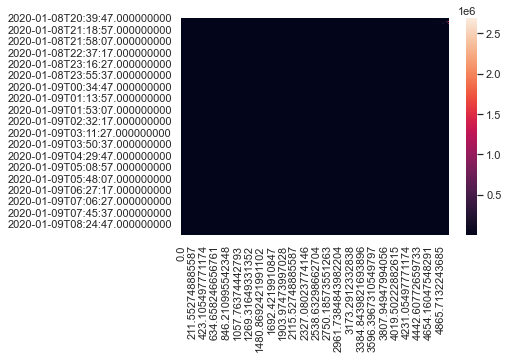

band 0 from 2020-01-09 11:29:00 to 2020-01-10 08:17:26:


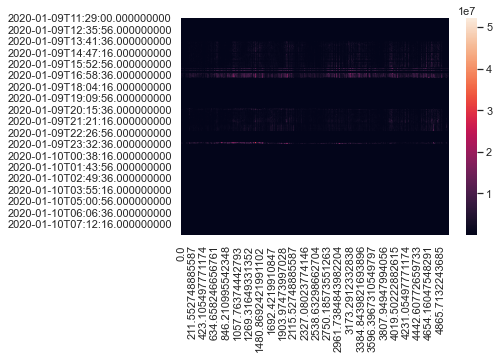

band 1 from 2020-01-08 11:28:41 to 2020-01-08 19:41:41:


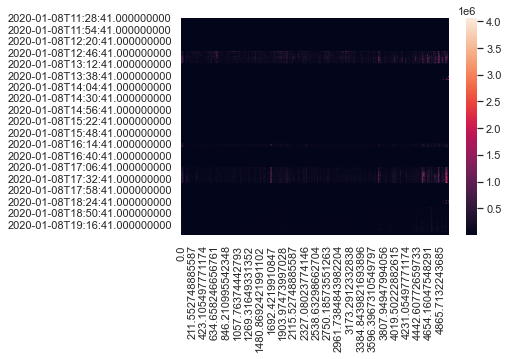

band 1 from 2020-01-08 20:39:47 to 2020-01-09 09:03:17:


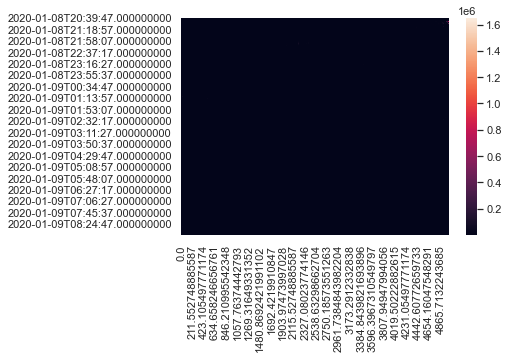

band 1 from 2020-01-09 11:29:00 to 2020-01-10 08:17:26:


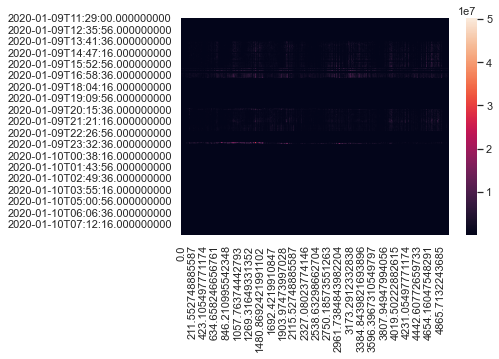

band 2 from 2020-01-08 11:28:41 to 2020-01-08 19:41:41:


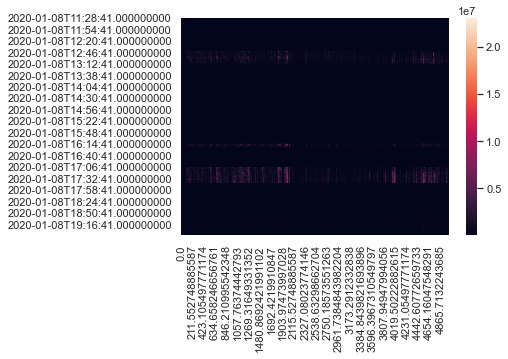

band 2 from 2020-01-08 20:39:47 to 2020-01-09 09:03:17:


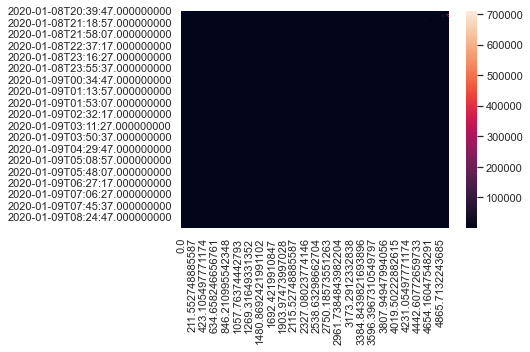

band 2 from 2020-01-09 11:29:00 to 2020-01-10 08:17:26:


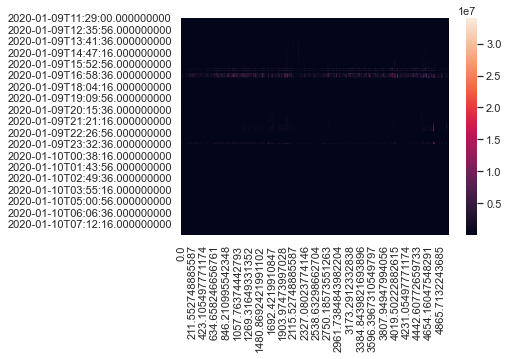

band 3 from 2020-01-08 11:28:41 to 2020-01-08 19:41:41:


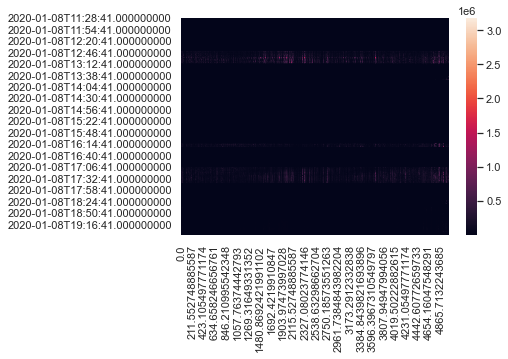

band 3 from 2020-01-08 20:39:47 to 2020-01-09 09:03:17:


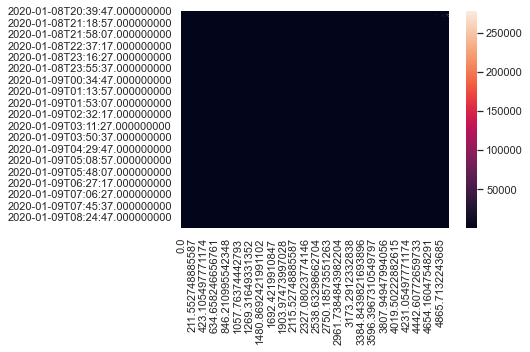

band 3 from 2020-01-09 11:29:00 to 2020-01-10 08:17:26:


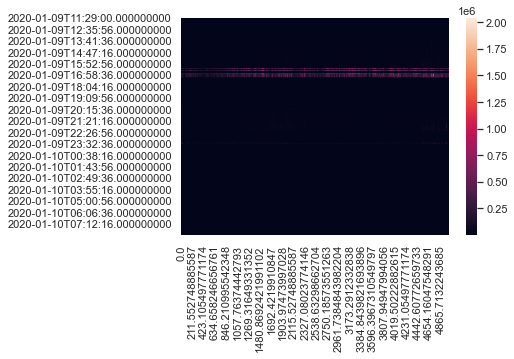

band 4 from 2020-01-08 11:28:41 to 2020-01-08 19:41:41:


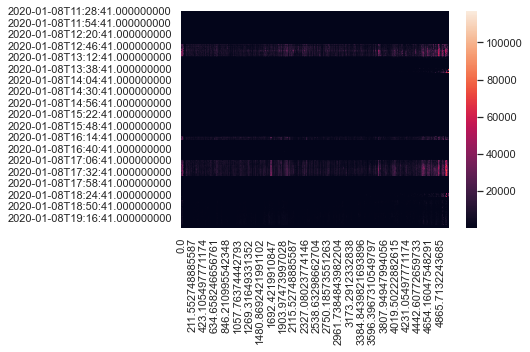

band 4 from 2020-01-08 20:39:47 to 2020-01-09 09:03:17:


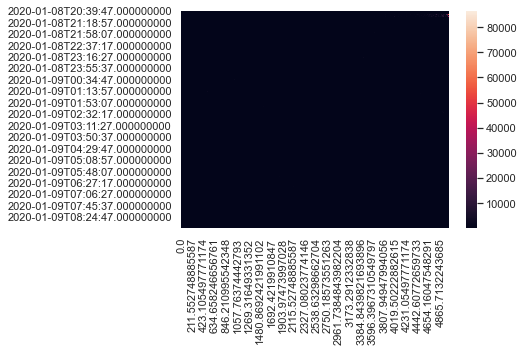

band 4 from 2020-01-09 11:29:00 to 2020-01-10 08:17:26:


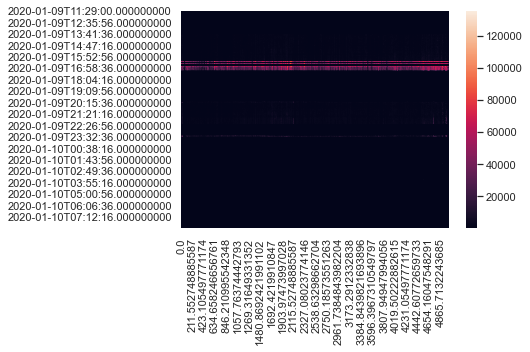

band 5 from 2020-01-08 11:28:41 to 2020-01-08 19:41:41:


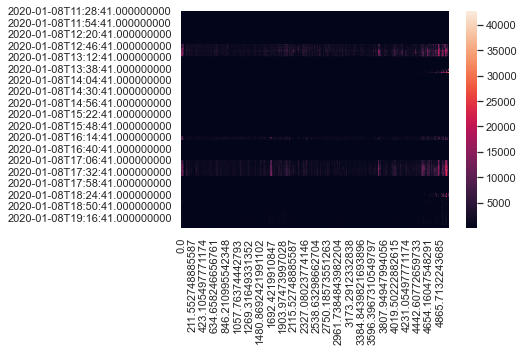

band 5 from 2020-01-08 20:39:47 to 2020-01-09 09:03:17:


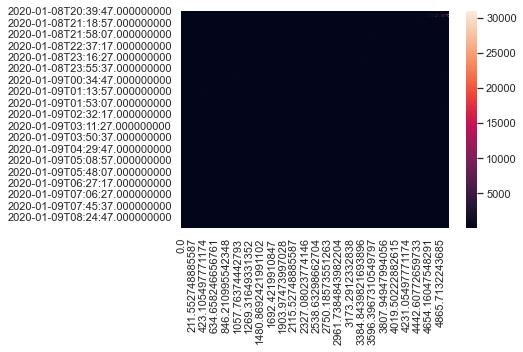

band 5 from 2020-01-09 11:29:00 to 2020-01-10 08:17:26:


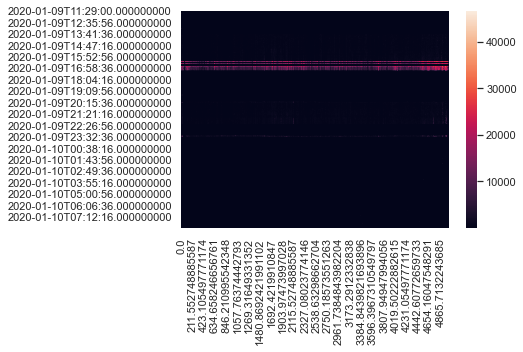

band 6 from 2020-01-08 11:28:41 to 2020-01-08 19:41:41:


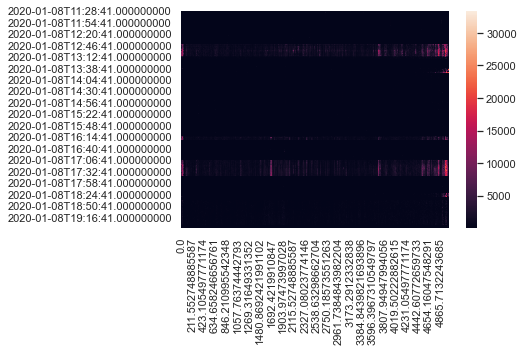

band 6 from 2020-01-08 20:39:47 to 2020-01-09 09:03:17:


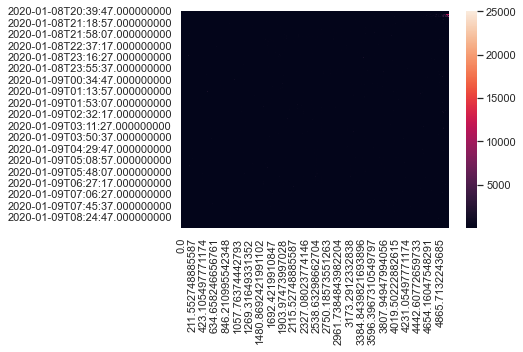

band 6 from 2020-01-09 11:29:00 to 2020-01-10 08:17:26:


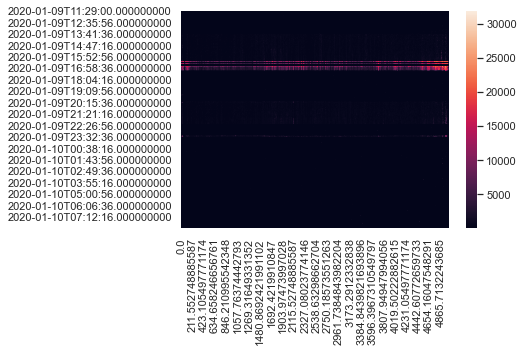

band 7 from 2020-01-08 11:28:41 to 2020-01-08 19:41:41:


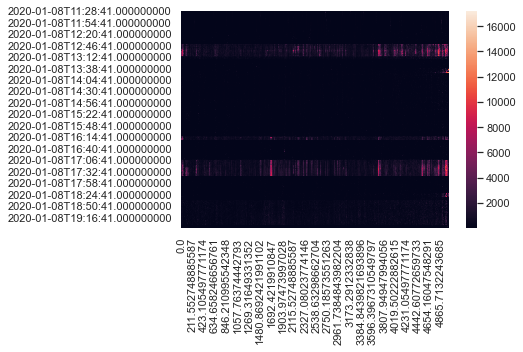

band 7 from 2020-01-08 20:39:47 to 2020-01-09 09:03:17:


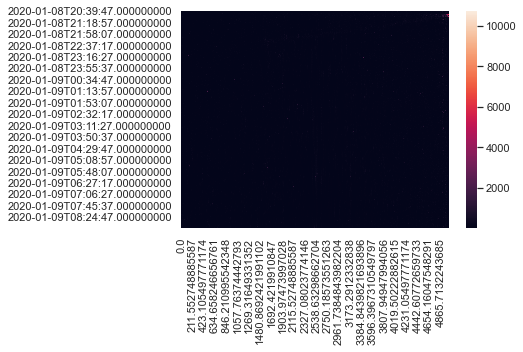

band 7 from 2020-01-09 11:29:00 to 2020-01-10 08:17:26:


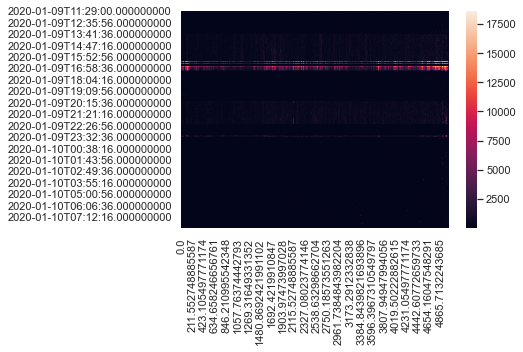

In [3]:
highFreqBandsPaths = []
for band in range(8):
    highFreqFBEdays = [os.path.join("LSU_Day1_Test_Jan08_2020", "FbePhase_DM_TZ_Corrected", 
             "hDvs_01_DEPTH_DM_TZ_5032ft_Band-0"+ str(band) + ".csv"), 
            os.path.join("LSU_Day1_Test_Jan08_2020_Overnight", "FbePhase_DM_TZ_Corrected", 
             "hDvs_01_DEPTH_DM_TZ_5032ft_Band-0" + str(band) + ".csv"), 
            os.path.join("LSU_Day2_Test_Jan09_2020", "FbePhase_DM_TZ_Corrected", 
             "hDvs_01_DEPTH_DM_TZ_5032ft_Band-0" + str(band) + ".csv")]
    highFreqFBEpaths=[]
    for day in highFreqFBEdays:
        highFreqFBEpaths.append(os.path.join("Data" ,"LSU DAS - FBE", day))
    highFreqBandsPaths.append(highFreqFBEpaths)

#import the low frequency data
HighFreqBandsDic = {}
for band in range(8):
    HighFreqDataDic = {}
    for path in highFreqBandsPaths[band]:
        df=pd.read_csv(path, header=1, index_col=0)
        df=df.T
        df.drop(df.tail(1).index,inplace=True) #drop last row, it doesn't have any data
        df.index = pd.to_datetime(df.index)
        HighFreqDataDic.update({(df.index[0], df.index[-1]) : df})
        print("band {} from {} to {}:".format(band, df.index[0], df.index[-1]))
        sns.set()
        sns.heatmap(df)
        plt.show()
    HighFreqBandsDic.update({band : HighFreqDataDic})

# Downhole Pressure data import

This is where we import our pressure sensor data. The "Masterdf" dataframe contains timeseries data of all the four sensors per 1 second frequency timestamps.

In [4]:
PTDataDic = {
    "Pressure Sensor A" : "LSU_Gauge_PT_487.35_ftMD_Jan8-10_2020.xlsx",
    "Pressure Sensor B" : "LSU_Gauge_PT_2022.89_ftMD_Jan8-10_2020.xlsx",
    "Pressure Sensor C" : "LSU_Gauge_PT_3502.22_.ftMD_Jan8-10_2020.xlsx",
    "Pressure Sensor D" : "LSU_Gauge_PT_5024.06_.ftMD_Jan8-10_2020.xlsx"
}

PTDataPaths = {}
for Sensor in PTDataDic:
    datapath = os.path.join("Data" ,"LSU_Gauge_PT_Data", PTDataDic[Sensor])
    PTDataPaths.update({Sensor : datapath})

dfPDic = {}
Counter = 0
for Sensor in PTDataPaths:
    dfDic = pd.read_excel(PTDataPaths[Sensor], index_col=0, sheet_name=None)
    currentDf = pd.DataFrame()
    for day in dfDic:
        df = dfDic[day]
        df.drop(df.columns[-1], axis=1, inplace=True) #drop Temperature data
        df.index = pd.to_datetime(df.index)
        currentDf = currentDf.append(df)

    if Counter == 0:
        start = currentDf.index[1000]
        end = currentDf.index[-1000]
        rng = pd.date_range(start, end, freq='S')
        Masterdf = currentDf[(currentDf.index > start) & (currentDf.index < end)]
        Masterdf = Masterdf.groupby(level=0).mean() # average out duplicate sensor readings
        Masterdf = Masterdf.reindex(rng, method = 'nearest')
    else:
        df = currentDf[(currentDf.index > start) & (currentDf.index < end)]
        df = df.groupby(level=0).mean()  # average out duplicate sensor readings
        df = df.reindex(rng, method='nearest')
        Masterdf = pd.concat([Masterdf, df], axis = 1)
        
    Counter += 1

# Visualize Pressure Data

Here You can visualize the pressure data for each sensor. Also, the time intervals where corresponding fiber optics readings are available are highlighed in green.

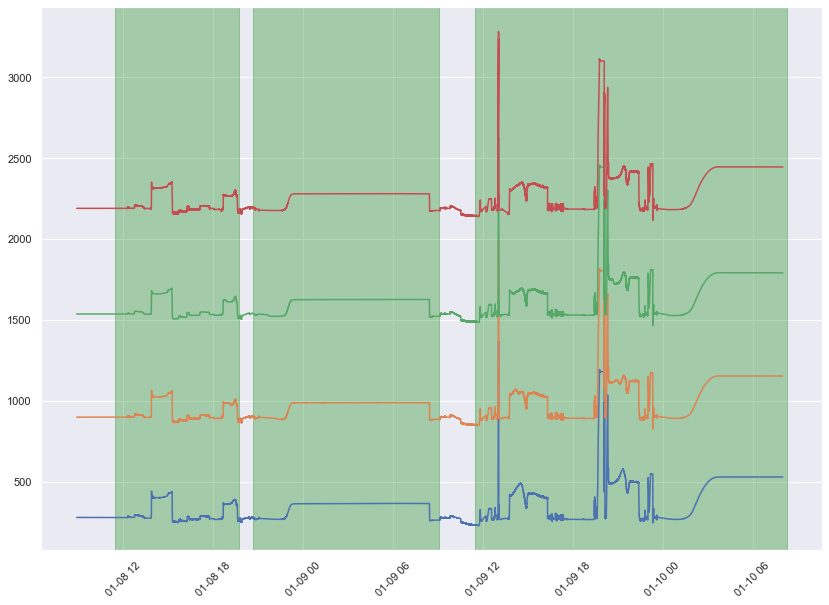

In [5]:
fig, ax = plt.subplots(figsize=(14,10))
for Sensor in Masterdf.columns:
    plt.plot(Masterdf[Sensor])
plt.xticks(rotation=45)
for TimeRange in LowFreqDataDic:
    ax.axvspan(TimeRange[0], TimeRange[1], color="green", alpha=0.3)
plt.show()

# Create Pressure Gradient Data

For the intents of this competition, we're interested in relating the fiber optics readings between every two sensors as the X variable and the pressure gradient in that interval as the Y variable. So, we'll make a new dataframe that contains pressure gradient data.

In [6]:
data = {
    'AB' : (Masterdf['Bank Data Pressure.P/T Pressure B(psi)'].values - Masterdf['Bank Data Pressure.P/T Pressure A(psi)'].values) / 1535,
    'BC' : (Masterdf['Bank Data Pressure.P/T Pressure C(psi)'].values - Masterdf['Bank Data Pressure.P/T Pressure B(psi)'].values) / 1480,
    'CD' : (Masterdf['Bank Data Pressure.P/T Pressure D(psi)'].values - Masterdf['Bank Data Pressure.P/T Pressure C(psi)'].values) / 1522
}
PGdf = pd.DataFrame(data, index = Masterdf.index)

# Visualize Pressure Gradient Data

Here You can visualize the pressure gradient data for each interval. Also, the time intervals where corresponding fiber optics readings are available are highlighed in green.


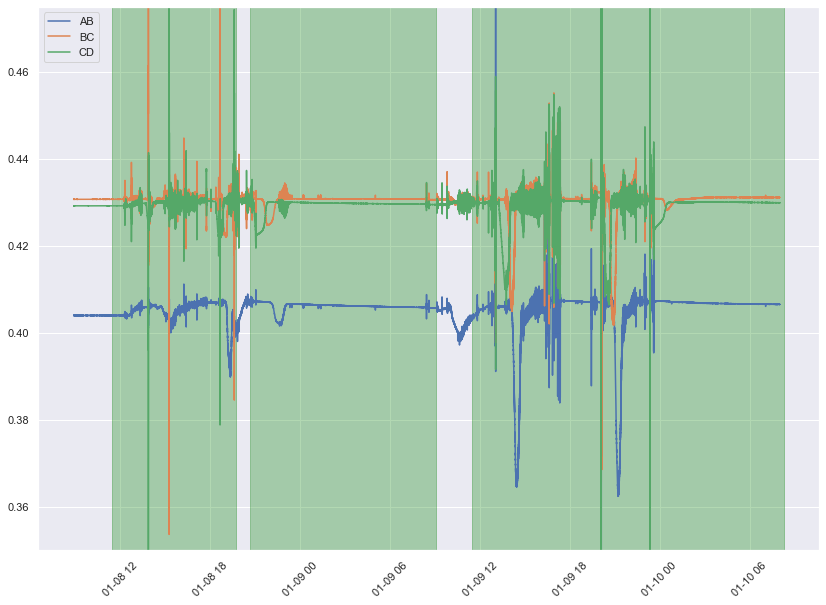

In [7]:
fig, ax = plt.subplots(figsize=(14,10))
for DepthInterval in PGdf.columns:
    plt.plot(PGdf[DepthInterval], label = DepthInterval)
plt.xticks(rotation=45)
for TimeRange in LowFreqDataDic:
    ax.axvspan(TimeRange[0], TimeRange[1], color="green", alpha=0.3)
plt.ylim((0.35, 0.475))
ax.legend()
plt.show()

# X-Y Data Prepartion for ML Training Job Example-1

Here an example is presented on how to dump all the low frequency fiberoptics and pressure gradient data that were imported above into two numpy arrays X and Y.
The X array would be an array of the shape: (number of timestamp data available x 600).
The Y array would be the corresponding pressure readings for each time step.
The ordering of timesteps is dependent on how the data is extracted (in the previous cells).

In [8]:
X = []
Y = []

for TimeInt in LowFreqDataDic:
    PGData = PGdf[(PGdf.index > TimeInt[0]) & (PGdf.index < TimeInt[1])]
    ABDataIndex = [(478 + x * 2.56) for x in list(range(600))]
    BCDataIndex = [(2023 + x * 2.465) for x in list(range(600))]  
    CDDataIndex = [(3502 + x * 2.537) for x in list(range(600))]
    
    df = LowFreqDataDic[TimeInt]
    # resample and reindex Pressure Gradient data to correspond to the fiber optics readings 
    # because they are taken on higher time interval
    PGData = PGData.resample('10S').mean()
    PGData = PGData.reindex(df.index, method='nearest') 
    
    AB_X = df.loc[:, (df.columns > 487) & (df.columns < 2023)]
    AB_X = AB_X.T.reindex(ABDataIndex, method = 'nearest').T
    BC_X = df.loc[:, (df.columns > 2023) & (df.columns < 3502)]
    BC_X = BC_X.T.reindex(BCDataIndex, method = 'nearest').T  
    CD_X = df.loc[:, (df.columns > 3502) & (df.columns < 5024)]
    CD_X = CD_X.T.reindex(CDDataIndex, method = 'nearest').T
    
    
    for item in range(len(PGData)):
        X.append(AB_X.iloc[item, :].values)
        X.append(BC_X.iloc[item, :].values)
        X.append(CD_X.iloc[item, :].values)
        Y.append(PGData.iloc[item, 0])
        Y.append(PGData.iloc[item, 1])
        Y.append(PGData.iloc[item, 2])

X, Y = np.asarray(X), np.asarray(Y)


# XGBoost fitting of Example-1 Data

This is an example simple training job and where you will have to focus for this competition.

In [10]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[18:56:12] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:13] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.004337


# Some Visualizations of Example-1 Training Job Results

Here are some ways to visualize how the xgboost performs. I'm using all of the data, including the training data, in this. You can change to your liking. Also, please note that in the first example cell, the ordering of the data points does not necessarily mean they're ordered in time or space. It all depends on how you engineer the data into X and Y; therefore, using a rolling average is probably not a good idea but still gives an idea.

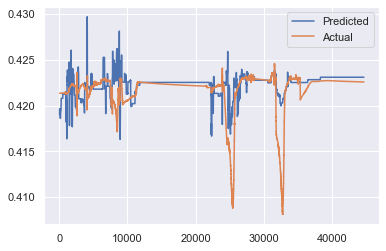

In [11]:
plt.plot(pd.Series(xg_reg.predict(X)).rolling(30).mean(), label = 'Predicted')
plt.plot(pd.Series(Y).rolling(30).mean(), label = 'Actual')
plt.legend()
plt.show()

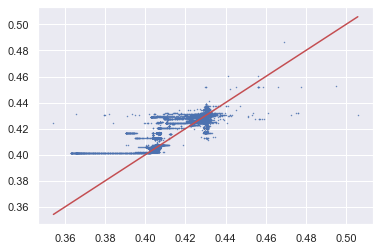

In [12]:
PredY = xg_reg.predict(X)
plt.scatter(Y, PredY, s = 0.2)
minimum = min(min(PredY), min(Y))
maximum = max(max(PredY), max(Y))
plt.plot([minimum, maximum], [minimum, maximum], c = 'r')
plt.show()

# X-Y Data Prepartion for ML Training Job Example-2

Here an example is presented on how to dump all the high frequency fiberoptics and pressure gradient data that were imported above into two numpy arrays X_shaped and Y. The X_shaped array would be an array of the shape: (number of timestamp data available x 8 x 600). The Y array would be the corresponding pressure readings for each time step. The ordering of timesteps is dependent on how the data is extracted (in the previous cells).

In [13]:
X = []
Y = []

for band in range(8):
    X_band = []
    for TimeInt in HighFreqBandsDic[band]:
        PGData = PGdf[(PGdf.index > TimeInt[0]) & (PGdf.index < TimeInt[1])]
        ABDataIndex = [(478 + x * 2.56) for x in list(range(600))]
        BCDataIndex = [(2023 + x * 2.465) for x in list(range(600))]  
        CDDataIndex = [(3502 + x * 2.537) for x in list(range(600))]

        df = LowFreqDataDic[TimeInt]
        # resample and reindex Pressure Gradient data to correspond to the fiber optics readings 
        # because they are taken on higher time interval
        PGData = PGData.resample('10S').mean()
        PGData = PGData.reindex(df.index, method='nearest') 

        AB_X = df.loc[:, (df.columns > 487) & (df.columns < 2023)]
        AB_X = AB_X.T.reindex(ABDataIndex, method = 'nearest').T
        BC_X = df.loc[:, (df.columns > 2023) & (df.columns < 3502)]
        BC_X = BC_X.T.reindex(BCDataIndex, method = 'nearest').T  
        CD_X = df.loc[:, (df.columns > 3502) & (df.columns < 5024)]
        CD_X = CD_X.T.reindex(CDDataIndex, method = 'nearest').T


        for item in range(len(PGData)):
            X_band.append(AB_X.iloc[item, :].values)
            X_band.append(BC_X.iloc[item, :].values)
            X_band.append(CD_X.iloc[item, :].values)
            
            #there's only one P reading for all 8 bands, so, this should be done only once.
            if band == 0: 
                Y.append(PGData.iloc[item, 0])
                Y.append(PGData.iloc[item, 1])
                Y.append(PGData.iloc[item, 2])
                
    X.append(X_band)
X, Y = np.asarray(X), np.asarray(Y)

#the X array is not the proper shape to be fed into a neural net along with this Y.
#the following code reshapes the X in proper format.

timesteps = X.shape[1]
bands = X.shape[0]  # should be 8
FBEreadings = X.shape[2] # should be 600 unless you choose to engineer your data differently
X_shaped = np.ndarray(shape = (timesteps, bands, FBEreadings))

for timestep in range(timesteps):
    for band in range(bands):
        for FBEreading in range(FBEreadings):
            X_shaped[timestep, band, FBEreading] = X[band, timestep, FBEreading]

# Convolutional Neural Net Fitting of Data Example-2

This example shows a basic CNN being fit to the data prepared for example 2.

In [14]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import MaxPooling2D, Conv1D

X_train, X_test, y_train, y_test = train_test_split(X_shaped, Y, test_size=0.3, random_state=123)
batch_size = 64
epochs = 100
FBE_model = Sequential()
FBE_model.add(Conv1D(32, kernel_size=3,activation='relu',
                     input_shape=(bands,FBEreadings),padding='same'))
#FBE_model.add(MaxPooling2D((2, 2)))
FBE_model.add(Conv1D(64, kernel_size=3, activation='relu'))
#FBE_model.add(MaxPooling2D((2, 2)))
FBE_model.add(Flatten())
FBE_model.add(Dense(100, kernel_initializer='normal', activation='relu'))
FBE_model.add(Dense(10, kernel_initializer='normal', activation='relu'))
FBE_model.add(Dense(1, activation ='linear'))

FBE_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'],loss='mean_absolute_error')
print(FBE_model.summary())

FBE_train = FBE_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,
                          verbose=1,validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 32)             57632     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               38500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 103,361
Trainable params: 103,361
Non-trainable params: 0
__________________________________________________

490/490 [==============================] - 2s 4ms/step - loss: 0.0077 - accuracy: 0.0000e+00 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 48/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - val_loss: 0.0106 - val_accuracy: 0.0000e+00
Epoch 49/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0078 - accuracy: 0.0000e+00 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 50/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0072 - accuracy: 0.0000e+00 - val_loss: 0.0082 - val_accuracy: 0.0000e+00
Epoch 51/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0065 - accuracy: 0.0000e+00 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 52/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0063 - accuracy: 0.0000e+00 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 53/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0059 - accuracy: 0.0000

# Some Visualizations of Example-2 Training Job Results

Here are some ways to visualize the predictions of the neural net we trained for example 2.

In [15]:
Y_pred = FBE_model.predict(X_shaped)
PredY = Y_pred.reshape([Y_pred.shape[0]])

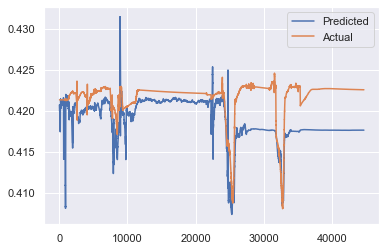

In [16]:
plt.plot(pd.Series(PredY).rolling(30).mean(), label = 'Predicted')
plt.plot(pd.Series(Y).rolling(30).mean(), label = 'Actual')
plt.legend()
plt.show()

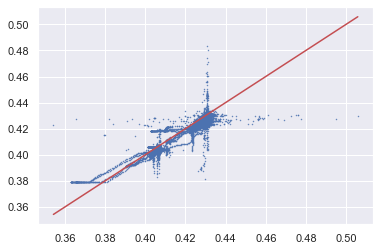

In [17]:
plt.scatter(Y, PredY, s = 0.2)
minimum = min(min(PredY), min(Y))
maximum = max(max(PredY), max(Y))
plt.plot([minimum, maximum], [minimum, maximum], c = 'r')
plt.show()

# Your Model

This is where you build your own ML model using the data that is available. There is no restriction on what to build and how to build it as long as you import the proper libraries and do it in Python 3.
Your function should take an input which is of the shape (600) if you your model is on low frequency data; or of the shape (8, 600) if your model is on high frequency data. It should output one single scalar which is the pressure gradient.
We will use this function and run it through our test data, which your model has never seen, and rank the models based on Mean Squared Error of your predictions versus real readings.

In [ ]:
#All your imports here.

def MyPredictor(InputNPArray):
    
    #All your code here.
    
    return MyPGPrediction #a scalar    
    